## 1️⃣ Data Understanding

### Tasks:
- Load the dataset
- Display the first few rows
- Inspect the dataset shape
- Check column names and data types

In [191]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [192]:
df = pd.read_csv("student_Dataset.csv", encoding="latin1")
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


In [193]:
df.shape

(77, 11)

In [194]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     str    
 1   lNAME          77 non-null     str    
 2   Age            77 non-null     int64  
 3   gender         77 non-null     str    
 4   country        77 non-null     str    
 5   residence      77 non-null     str    
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     str    
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), str(6)
memory usage: 6.7 KB


## 2️⃣ Data Cleaning

### Tasks:
- Ensure text-based columns follow a consistent format
- Remove or ignore columns that do not add analytical value
- Standardize categorical values if needed

In [195]:
df.columns = df.columns.str.lower().str.strip()
df.columns

Index(['fname', 'lname', 'age', 'gender', 'country', 'residence', 'entryexam',
       'preveducation', 'studyhours', 'python', 'db'],
      dtype='str')

In [196]:
df.drop(columns=['fname', 'lname'], inplace=True)
df.columns


Index(['age', 'gender', 'country', 'residence', 'entryexam', 'preveducation',
       'studyhours', 'python', 'db'],
      dtype='str')

In [197]:
df['gender'] = df['gender'].str.lower().str.strip()
df['gender'].unique()


<StringArray>
['female', 'm', 'male', 'f']
Length: 4, dtype: str

In [198]:
df['residence'] = df['residence'].str.lower().str.strip()


In [199]:
df['preveducation'] = df['preveducation'].str.lower().str.strip()


In [200]:
df.info()
df.head()


<class 'pandas.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            77 non-null     int64  
 1   gender         77 non-null     str    
 2   country        77 non-null     str    
 3   residence      77 non-null     str    
 4   entryexam      77 non-null     int64  
 5   preveducation  77 non-null     str    
 6   studyhours     77 non-null     int64  
 7   python         75 non-null     float64
 8   db             77 non-null     int64  
dtypes: float64(1), int64(4), str(4)
memory usage: 5.5 KB


,age,gender,country,residence,entryexam,preveducation,studyhours,python,db
0,44,female,Norway,private,72,masters,158,59.0,55
1,60,m,Kenya,private,79,diploma,150,60.0,75
2,25,male,Uganda,sognsvann,55,highschool,130,74.0,50
3,22,f,Rsa,sognsvann,40,high school,120,NaN,44
4,23,female,South Africa,sognsvann,65,high school,122,91.0,80


## Data Cleaning

- Standardized column names for consistency and readability.
- Removed name-related columns as they do not contribute to performance analysis.
- Normalized categorical text values to avoid hidden category duplication.


## 3️⃣ Handling Missing Data

### Tasks:
- Detect missing values
- Decide how to handle them
- Apply an appropriate strategy

In [225]:
df.isnull().sum()

age              0
gender           0
country          0
residence        0
entryexam        0
preveducation    0
studyhours       0
python           0
db               0
dtype: int64

In [226]:
df[df['python'].isna()]


,age,gender,country,residence,entryexam,preveducation,studyhours,python,db


In [227]:
python_median = df['python'].median()
df['python'] = df['python'].fillna(python_median)



In [228]:
df.isnull().sum()


age              0
gender           0
country          0
residence        0
entryexam        0
preveducation    0
studyhours       0
python           0
db               0
dtype: int64

### Handling Missing Data

- Missing values were detected in the `python` exam score.
- Since the dataset is relatively small, rows were not removed.
- Median imputation was applied to preserve data integrity and reduce the impact of outliers.


Using median instead of mean ensures that extreme exam scores do not bias the imputed values.


4️⃣ Outlier Detection

### Tasks:
- Identify potential outliers in numerical features
- Visualize them using appropriate plots
- Decide how to treat them

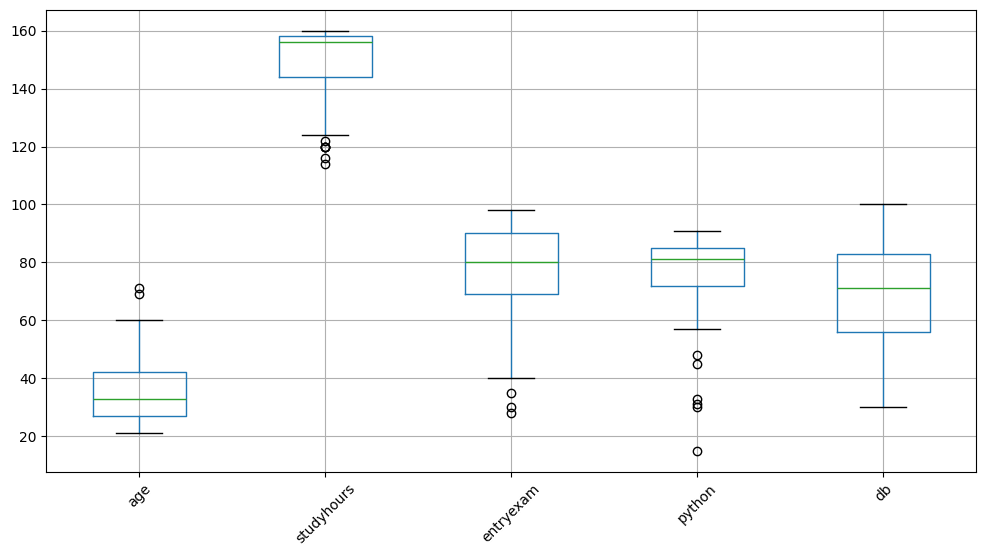

In [229]:
num_cols = ['age', 'studyhours', 'entryexam', 'python', 'db']

plt.figure(figsize=(12, 6))
df[num_cols].boxplot()
plt.xticks(rotation=45)
plt.show()

In [230]:
df[(df['age'] < 15) | (df['age'] > 60)]


,age,gender,country,residence,entryexam,preveducation,studyhours,python,db
32,71,female,Norway,private,30,doctorate,120,31.0,42
55,69,male,Nigeria,private,94,doctorate,160,87.0,88


### Age Outliers Analysis

Two students were identified with ages above 60.
After manual inspection, these records were retained as they represent valid cases
of postgraduate education and do not indicate data entry errors.


In [231]:
df[df['studyhours'] > 150]


,age,gender,country,residence,entryexam,preveducation,studyhours,python,db
0,44,female,Norway,private,72,masters,158,59.0,55
6,27,male,Norway,bi-residence,90,bachelors,156,80.0,91
7,29,male,norway,biresidence,89,barrrchelors,160,85.0,60
8,31,male,Norway,bi residence,88,bachelors,156,80.0,89
9,33,female,Denmark,bi_residence,85,bachelors,160,83.0,90
10,34,female,Netherlands,bi residence,65,bachelors,156,79.0,58
11,36,female,Norway,private,70,diploma,156,80.0,55
12,38,male,Norway,private,91,diploma,156,85.0,99
14,42,male,Italy,private,80,bachelors,152,75.0,77
15,43,female,Norway,private,81,bachelors,156,80.0,82


In [232]:
df[
    (df['entryexam'] > 100) |
    (df['python'] > 100) |
    (df['db'] > 100)
]

,age,gender,country,residence,entryexam,preveducation,studyhours,python,db


### Outlier Detection

- Visual inspection using boxplots was applied to numerical features.
- Logical constraints were used to evaluate extreme values.
- Only values deemed unrealistic were considered for removal to avoid information loss.


Not all statistical outliers were removed, as some extreme values may represent valid high-performing students.


## 5️⃣ Feature Transformation

### Tasks:
- Apply transformations if necessary
- Create at least one new meaningful feature

In [234]:
df['total_score'] = (
    df['entryexam'] +
    df['python'] +
    df['db']
)

In [235]:
df['score_per_hour'] = df['total_score'] / df['studyhours']


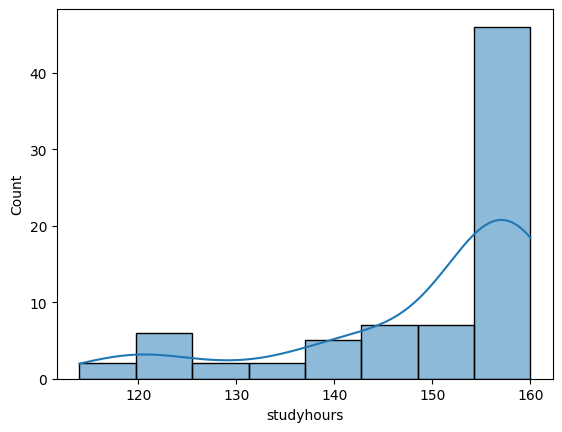

In [236]:
sns.histplot(df['studyhours'], kde=True)
plt.show()


In [237]:
df['log_studyhours'] = np.log1p(df['studyhours'])


### Feature Transformation & Engineering

- Created a total_score feature to represent overall academic performance.
- Engineered score_per_hour to measure learning efficiency.
- Applied logarithmic transformation to study hours to reduce skewness.


## 6️⃣ Categorical Data Handling

### Tasks:
- Identify categorical features
- Convert them into numerical representations

###  Hint:
> Numbers in machine learning don’t always mean *quantity*.  
Encoding choice matters.

In [239]:
cat_cols = df.select_dtypes(include=['object', 'string']).columns
cat_cols

Index(['gender', 'country', 'residence', 'preveducation'], dtype='str')

In [240]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['gender', 'country', 'residence']:
    df[col] = le.fit_transform(df[col])

In [241]:
education_order = {
    'high school': 0,
    'diploma': 1,
    'masters': 2,
    'doctorate': 3
}

df['preveducation'] = df['preveducation'].map(education_order)

In [242]:
df.head()
df.dtypes

age                 int64
gender              int64
country             int64
residence           int64
entryexam           int64
preveducation     float64
studyhours          int64
python            float64
db                  int64
total_score       float64
score_per_hour    float64
log_studyhours    float64
dtype: object

### Categorical Data Handling

- Identified categorical features and converted them into numerical format.
- Applied label encoding for nominal variables such as gender, country, and residence.
- Used ordinal encoding for educational level to preserve its natural order.


## 7️⃣ Feature Scaling

### Tasks:
- Identify features that require scaling
- Apply an appropriate scaling technique

### Hint:
> Some algorithms care about distance, others don’t.  
Prepare the data as if a model will use it next.

In [243]:
X = df.drop(columns=['total_score'], errors='ignore')

In [244]:
num_cols = X.columns

In [245]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [246]:
X_scaled.describe()

,age,gender,country,residence,entryexam,preveducation,studyhours,python,db,score_per_hour,log_studyhours
count,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,5.000000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01
mean,-1.975332e-16,-5.190653e-17,2.883696e-18,-1.268826e-16,-1.787892e-16,4.884981e-17,-6.127854e-16,-9.011551e-17,1.816729e-16,7.612958e-16,6.029809e-15
std,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.010153e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00
min,-1.382809e+00,-1.851996e+00,-2.472511e+00,-1.236776e+00,-2.978489e+00,-1.129680e+00,-2.820977e+00,-4.031051e+00,-2.332220e+00,-2.980508e+00,-2.959810e+00
25%,-7.988437e-01,-8.547674e-01,1.002370e-01,-1.236776e+00,-4.736702e-01,-1.129680e+00,-4.513564e-01,-2.635291e-01,-7.958250e-01,-5.309480e-01,-3.861729e-01
50%,-2.148788e-01,-8.547674e-01,1.002370e-01,6.870975e-01,1.983544e-01,-1.558179e-01,4.964920e-01,3.313428e-01,9.055675e-02,2.879664e-02,4.966303e-01
75%,6.610685e-01,1.139690e+00,1.002370e-01,6.870975e-01,8.092858e-01,8.180439e-01,6.544667e-01,5.957303e-01,7.996622e-01,7.387356e-01,6.371735e-01
max,3.483565e+00,1.139690e+00,2.351392e+00,1.168066e+00,1.298031e+00,1.791906e+00,8.124415e-01,9.923116e-01,1.804228e+00,2.218087e+00,7.759597e-01


After applying StandardScaler, some feature values became negative.
This is expected behavior, as the scaler centers data around zero.
Negative values simply indicate observations below the feature mean,
not invalid or incorrect data.


### Feature Scaling

- Identified numerical features requiring normalization.
- Applied StandardScaler to ensure features are on comparable scales.
- Scaling was performed to prepare the data for distance-based models.


## 8️⃣ Class Distribution Analysis

### Tasks:
- Define a target variable based on student performance
- Analyze its distribution

### Hint:
> A model trained on unbalanced data learns bias faster than patterns.

In [247]:
threshold = df['total_score'].median()

df['performance_level'] = np.where(
    df['total_score'] >= threshold,
    'high',
    'low'
)

In [248]:
df['performance_level'].value_counts()

performance_level
high    40
low     37
Name: count, dtype: int64

- The class distribution is well balanced, with 40 high-performing students
and 37 low-performing students. This balanced split reduces the risk of
model bias and supports fair performance evaluation.

- Balanced target classes ensure that future models learn meaningful patterns
rather than favoring the majority class.


## 9️⃣ Feature Selection

### Tasks:
- Analyze feature relationships
- Remove unnecessary or redundant features

### Hint:
> More features ≠ better model.  
Clarity beats complexity.

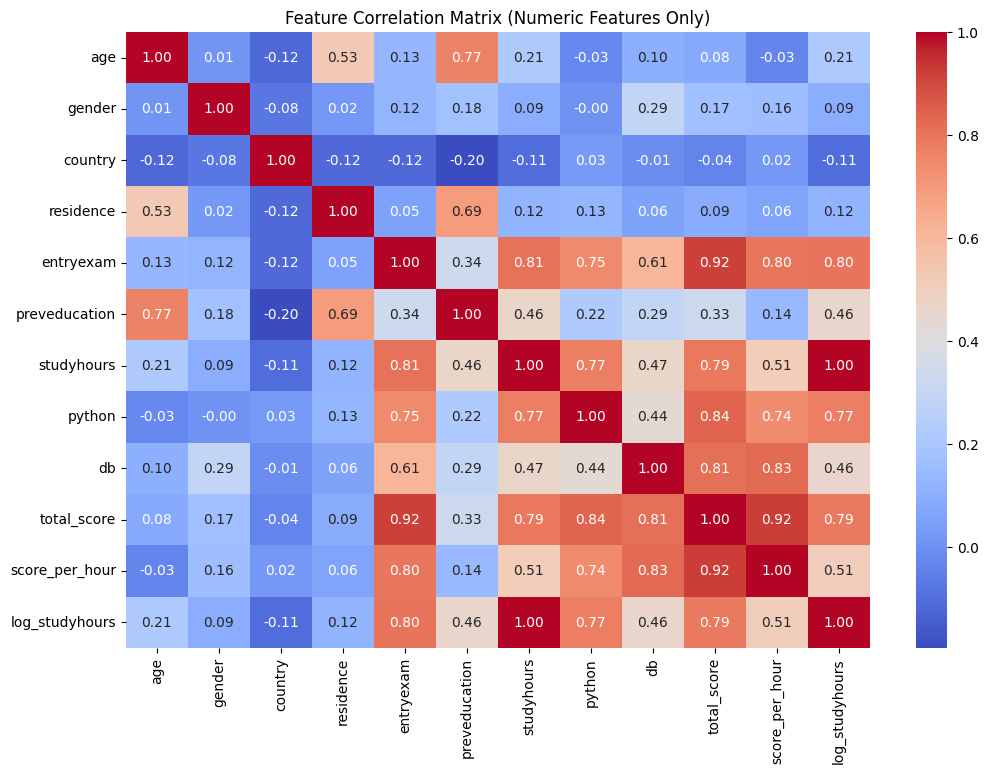

In [251]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix (Numeric Features Only)")
plt.show()


Correlation analysis was performed only on numerical features, as correlation
metrics are not defined for categorical target variables.


Correlation analysis revealed strong relationships between total_score and
individual exam scores, indicating potential data leakage.
Derived features were removed to prevent redundancy and ensure model integrity.
Study hours showed a strong positive correlation with exam performance,
highlighting its importance as a predictive feature.


## 🔟 Train-Test Split

### Tasks:
- Split the dataset into training and testing sets
- Follow best practices

### Hint:
> Never allow future information to leak into training data.

In [252]:
features = [
    'age',
    'gender',
    'country',
    'residence',
    'entryexam',
    'preveducation',
    'studyhours',
    'python',
    'db'
]

X = df[features]
y = df['performance_level']

In [254]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [255]:
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)

performance_level
low     0.5
high    0.5
Name: proportion, dtype: float64

### Train–Test Split

- Split the dataset into training (80%) and testing (20%) sets.
- Used stratified sampling to preserve class distribution.
- Ensured no target leakage by excluding derived performance features.
